# Milestone 1 - Data Visualization Complementary Views 

## Author - Anjali Aggarwal



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)

In [3]:
headcount_df.head(10)#Checking first 10 rows of data

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47
5,BA,9/16/2011,11,0,1,0,0,6,47
6,BA,9/16/2011,12,0,1,0,0,6,47
7,BA,9/16/2011,13,0,1,0,0,6,47
8,BA,9/16/2011,14,0,1,0,0,6,47
9,BA,9/16/2011,15,0,1,0,0,6,47


In [4]:
headcount_df.tail()#checking last 5 rows of data

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
175672,WR,10/31/2011,19,0,0,1,0,2,92
175673,WR,10/31/2011,20,1,1,0,1,2,92
175674,WR,10/31/2011,21,0,1,0,0,2,92
175675,WR,10/31/2011,22,1,1,0,1,2,92
175676,WR,10/31/2011,23,0,1,0,0,2,92


In [5]:
headcount_df.shape

(175677, 9)

In [6]:
headcount_df.dtypes

GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object

In [7]:
headcount_df.describe()# basic statistic description

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FFBC5CD68>,
      dtype=object)

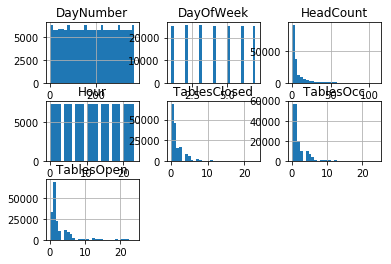

In [8]:
# plot overall histogram for all the features
headcount_df.hist(bins = 30)

For Features - HeadCount, Tables closed, Table occupied and Table open, distribution is skewed towards the right side. 

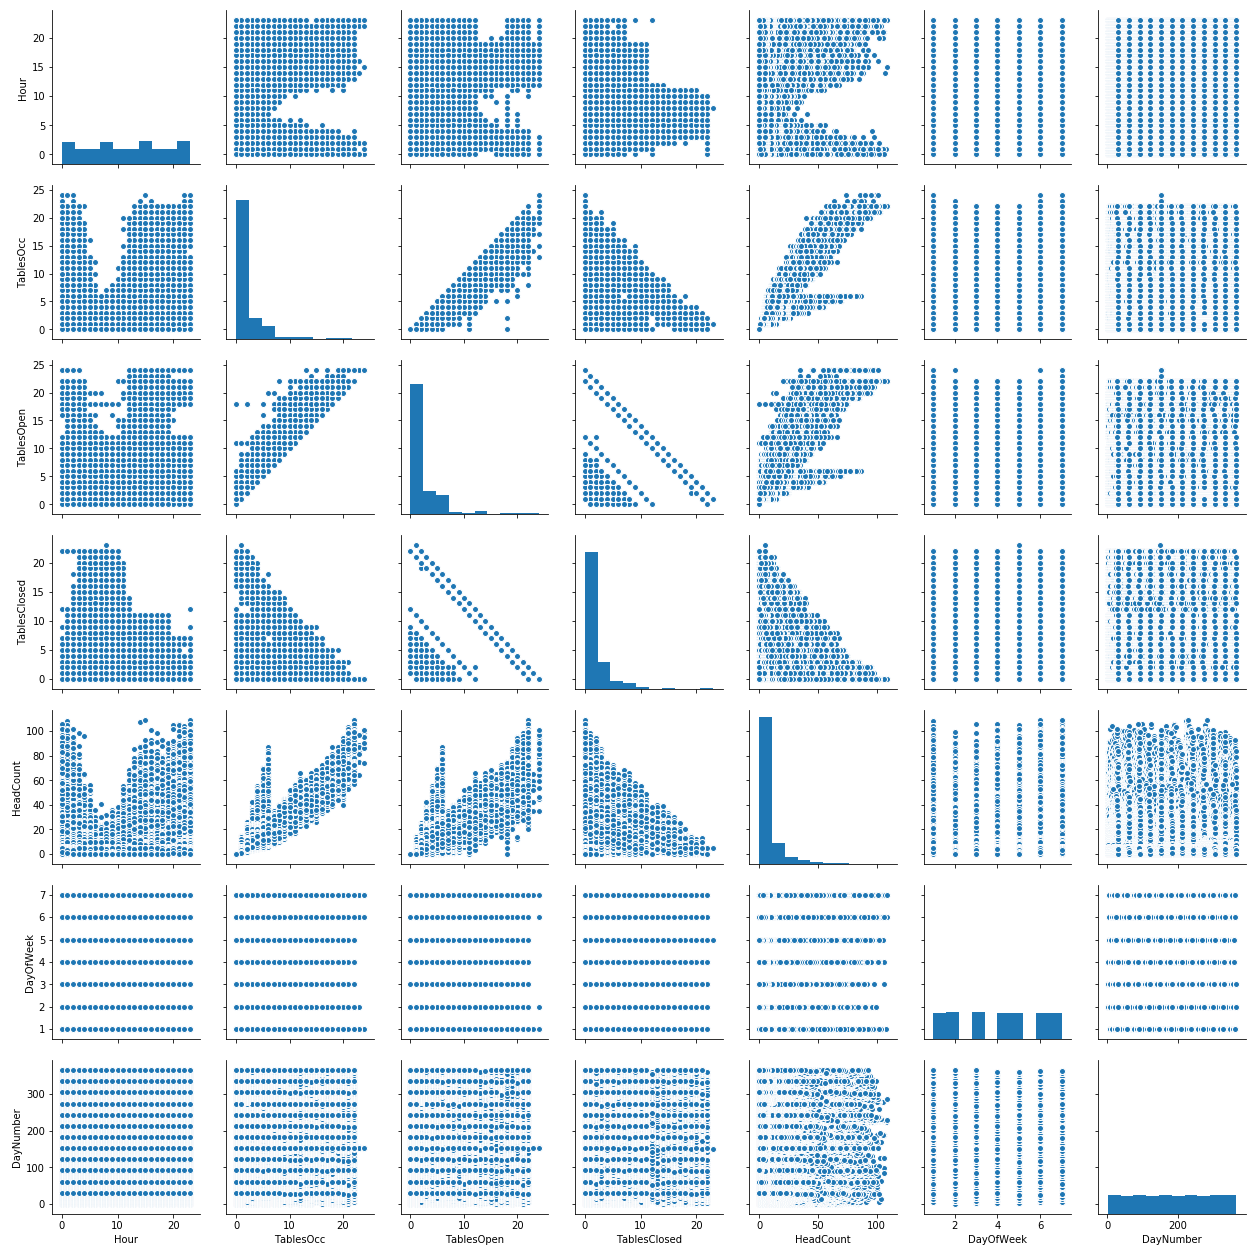

In [9]:
#checking relation between features by pairplotting
sns.pairplot(headcount_df)

Table occupied, Table closed, Table open, headcount, and Hour features are showing some realtionship

In [10]:
#Checking coorelation between features
headcount_corr = headcount_df[['Hour', 'TablesOcc', 'TablesOpen' , 'TablesClosed', 'HeadCount', 'DayOfWeek' , 'DayNumber']].corr()
headcount_corr

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
Hour,1.000000,0.150271,0.134911,-0.165562,0.171027,-0.000641,-0.000149
TablesOcc,0.150271,1.000000,0.973488,0.091488,0.932536,0.029641,0.020292
TablesOpen,0.134911,0.973488,1.000000,0.124094,0.889106,0.031448,0.029192
TablesClosed,-0.165562,0.091488,0.124094,1.000000,0.043878,-0.038390,-0.028820
HeadCount,0.171027,0.932536,0.889106,0.043878,1.000000,0.031059,0.014838
DayOfWeek,-0.000641,0.029641,0.031448,-0.038390,0.031059,1.000000,-0.002442
DayNumber,-0.000149,0.020292,0.029192,-0.028820,0.014838,-0.002442,1.000000


Table open and Table occupied, Head count and Table occupied are showing strong relationship

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

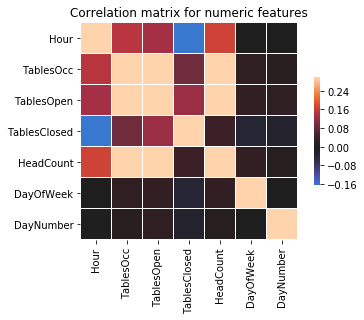

In [11]:
#Further checking relationship by plotting correlation matirx
sns.heatmap(headcount_corr, vmax=.3, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

Correlation matrix also showing realtionship between Table occupied, Table open, head count and also hour.

In [12]:
# time series plot
headcount_df.loc[:, 'DateFormat'] = pd.to_datetime(headcount_df.loc[:, 'DateFormat'])
headcount_df.set_index('DateFormat', inplace = True)
print(headcount_df.head())

           GameCode  Hour  TablesOcc  TablesOpen  TablesClosed  HeadCount  \
DateFormat                                                                  
2011-09-16       BA     6          0           0             1          0   
2011-09-16       BA     7          0           0             1          0   
2011-09-16       BA     8          0           0             1          0   
2011-09-16       BA     9          0           0             1          0   
2011-09-16       BA    10          0           1             0          0   

            DayOfWeek  DayNumber  
DateFormat                        
2011-09-16          6         47  
2011-09-16          6         47  
2011-09-16          6         47  
2011-09-16          6         47  
2011-09-16          6         47  


Text(0.5,1,'Time series of Table Occupied')

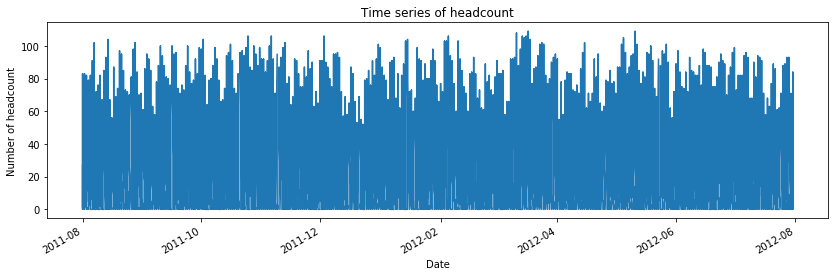

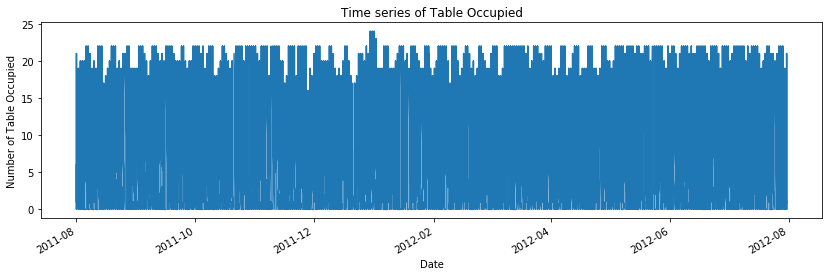

In [13]:
# Time series of Head Count and Table occupied is plotted to show if there is any relation at specific time of the year
ax = plt.figure(figsize=(14, 4)).gca() # define axis
headcount_df.loc[:, 'HeadCount'].plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of headcount')
ax.set_title('Time series of headcount')

ax = plt.figure(figsize=(14, 4)).gca() # define axis
headcount_df.loc[:, 'TablesOcc'].plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Table Occupied')
ax.set_title('Time series of Table Occupied')


By the time series graph, it is showing that end of the year and the start of the year are the time when table were most occupied.

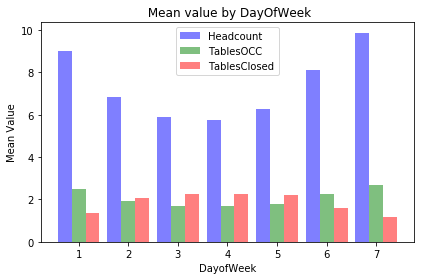

In [15]:
# Plot to show if there is specific day of the week which is mosy busy and less busy.
# Below a histogram is plotted between the mean of headcount, mean of table occupied and mean of table closed in respect to day of the week
import numpy as np
import matplotlib.pyplot as plt

n_groups = 7

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.28
opacity = 0.5

rects1 = plt.bar(index, headcount_df.groupby('DayOfWeek')['HeadCount'].mean(), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Headcount')
rects2 = plt.bar(index + bar_width, headcount_df.groupby('DayOfWeek')['TablesOcc'].mean(), bar_width,
                 alpha=opacity,
                 color='g',
                 label='TablesOCC')
rects2 = plt.bar(index + bar_width + bar_width, headcount_df.groupby('DayOfWeek')['TablesClosed'].mean(), bar_width,
                 alpha=opacity,
                 color='r',
                 label='TablesClosed')
plt.xlabel('DayofWeek')
plt.ylabel('Mean Value')
plt.title(' Mean value by DayOfWeek')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7'))
plt.legend()
 
plt.tight_layout()
plt.show()

This histogram shows Saturday and Sunday are the most busiest day of the week while Tuesday and Wednesday are the less popular.

In [16]:
# to check what time of the day is most crowded, the whole day is bin into 4 bins. first bin is 3am to 9 am, second bin is 9 am to 3 pm, 
#third bin is 3pm to 9 pm and fourth bin is 9pm to 3 am 
import pandas as pd
headcount_df.loc[:, 'Hour_bin'] = pd.cut(headcount_df.loc[:, 'Hour'], bins = 4, labels = ['3-9', '9-15', '15-21', '21-3'])
headcount_df.loc[:, 'Hour_bin'].head(20)

DateFormat
2011-09-16     9-15
2011-09-16     9-15
2011-09-16     9-15
2011-09-16     9-15
2011-09-16     9-15
2011-09-16     9-15
2011-09-16    15-21
2011-09-16    15-21
2011-09-16    15-21
2011-09-16    15-21
2011-09-16    15-21
2011-09-16    15-21
2011-09-16     21-3
2011-09-16     21-3
2011-09-16     21-3
2011-09-16     21-3
2011-09-16     21-3
2011-09-16     21-3
2011-09-17      3-9
2011-09-17      3-9
Name: Hour_bin, dtype: category
Categories (4, object): [3-9 < 9-15 < 15-21 < 21-3]

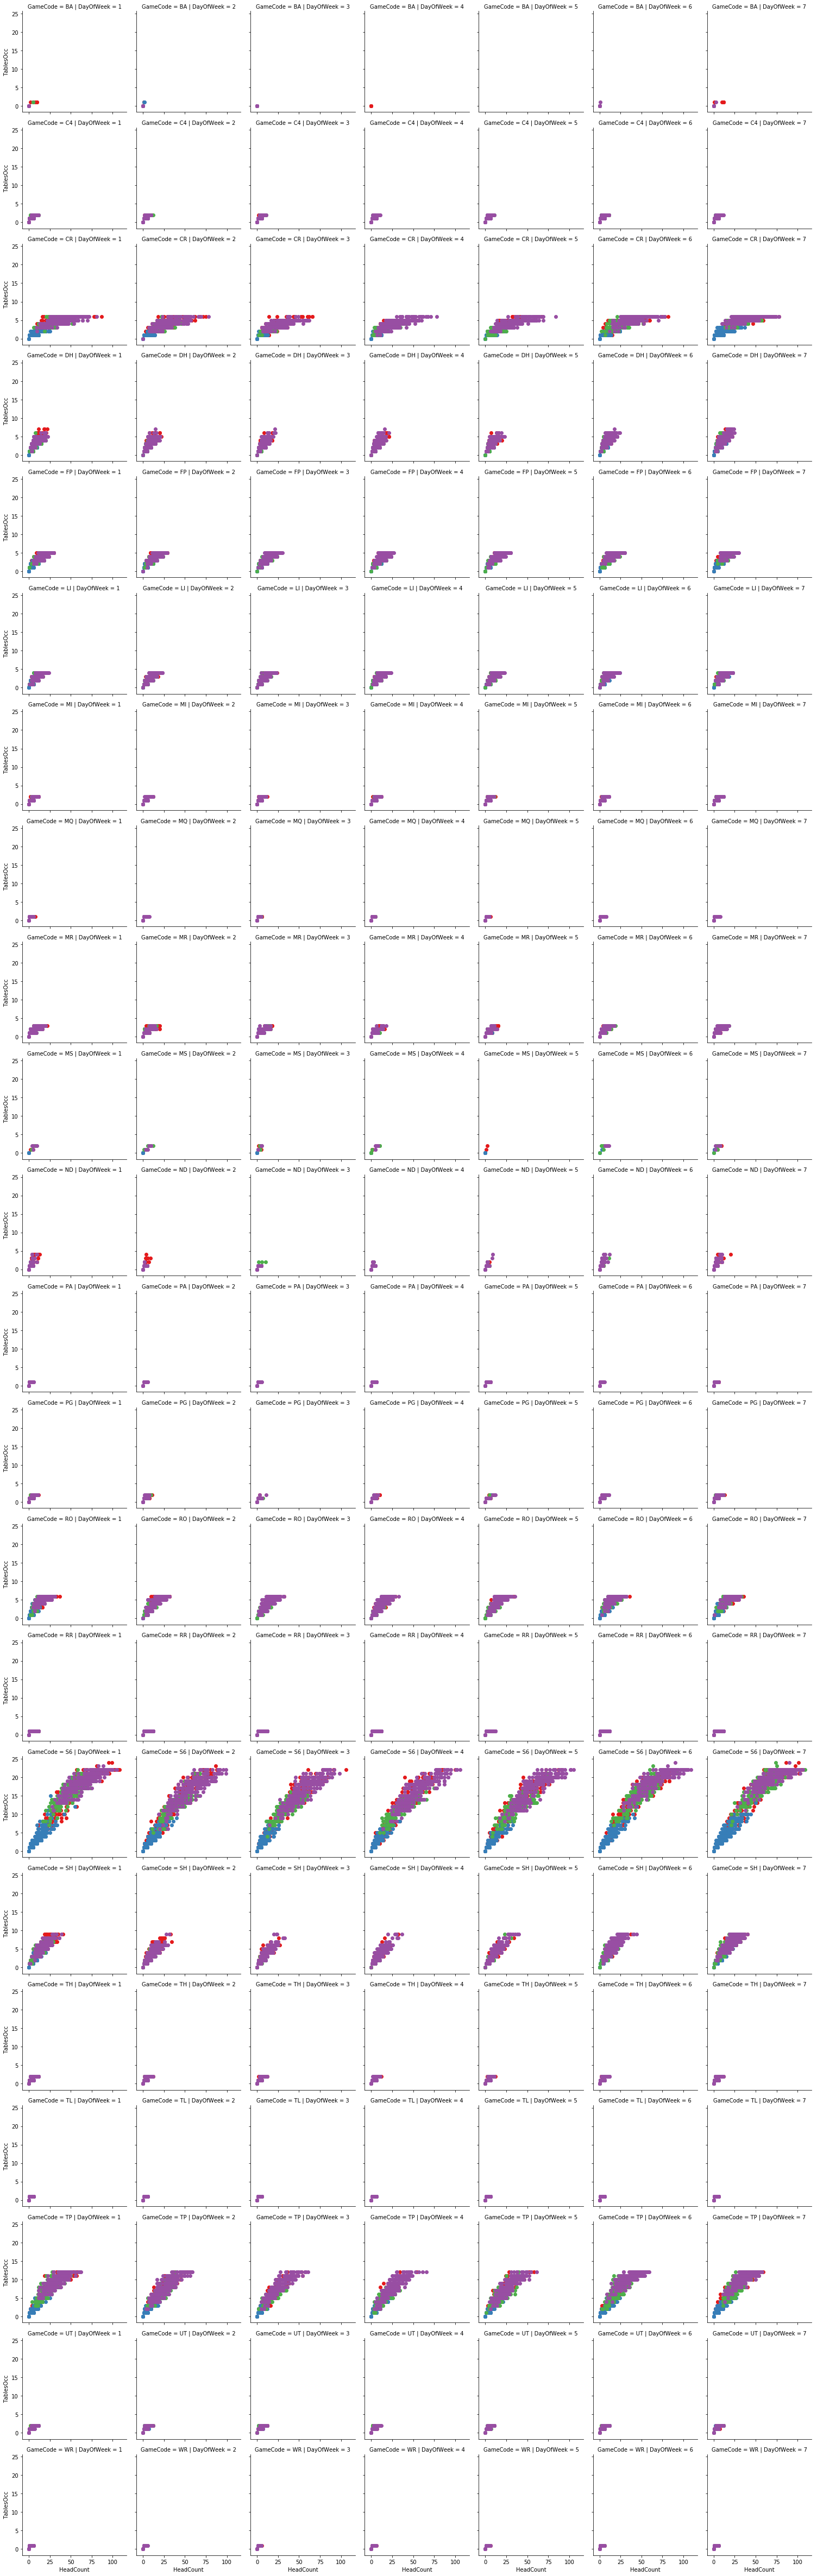

In [17]:
#projecting five dimensions using faceting on both categorical features (gamecode) and numeric features (DayOfWeek, Hour, HeadCount and TableOcc)
# 3am to 9 am is showing in red, 9am to 3pm is in blue, 3pm to 9pm in green and 9pm to 3am in violet 
g = sns.FacetGrid(headcount_df,  
                  row='GameCode', 
                  col= 'DayOfWeek',
                  hue= 'Hour_bin',
                  palette= 'Set1')               
g = g.map(plt.scatter, "HeadCount", "TablesOcc") 

In [ ]:
# By these distribution- S6 game is very popular afterthat TP game is most played game. The most poular hours are between 9 pm to 3 am.


# Observation:
- By the above data visulization it can be observed that maximun number of headcount, table open and table occupied are found on Saturday and Sunday and minimum number of headcount, table open and table occupied are on Tuesday and Wednesday.
- By Facetiing, Game S6 is found out most popular game after that game TP is popular, and 9pm to 3 am are the time hours of the day when there are most occupied table and maximum number of headcount. However there are some red dots which shows 3am to 9am are also the time of the day when there are most table occupied and headcount.

